In [1]:
import pandas as pd
import numpy as np
import os

to do:

    fit more peaks to find x0
    
    compute small and large separations
    
    try gaussian fit as well?
    
    fazer um gráfico sobre as frequências mais pequenas e comentar, como no paper
    
    fazer grafico como fig 1 e fig 2 do paper 1

In [2]:
dir = "/home/rita13santos/Desktop/AstrophysicsLaboratory/StellarOscilations/DATA/"

In [3]:
count = 0
for path in os.listdir(dir):
    # check if current path is a file
    if os.path.isfile(os.path.join(dir, path)):
        count += 1
print('File count in dir', dir, 'is: ', count)

File count in dir /home/rita13santos/Desktop/AstrophysicsLaboratory/StellarOscilations/DATA/ is:  4


# Reading and writing to an array all data from the 4 given files

In [4]:
files=['data2calib1pm1.txt','data2calib1pm2.txt','data2calib2pm1.txt','data2calib2pm2.txt']
# 4 * 197640 = 790560 (total number of files)

data = []

for i in range(count):

    df = pd.read_fwf(dir+files[i], header=None)

    #print(df.iloc[:, 0])

    cols = []

    col1 = df.iloc[:, 0]
    col1 = col1.to_numpy()
    cols.append(col1)

    col2 = df.iloc[:, 1]
    col2 = col2.to_numpy()
    cols.append(col2)

    col3 = df.iloc[:, 2]
    col3 = col3.to_numpy()
    cols.append(col3)

    col4 = df.iloc[:, 3]
    col4 = col4.to_numpy()
    cols.append(col4)

    cols=np.transpose(cols)

    total_data = []
    for i in range(len(cols)):
        total_data = np.concatenate((total_data,cols[i]))

    print('len total data is', len(total_data))
    print('total_data=',total_data)
    
    data.append(total_data)

print(len(data))

len total data is 790560
total_data= [ 1.50149   2.30147   2.62921  ... -0.742475 -0.372451 -0.705769]
len total data is 790560
total_data= [ 2.86432   1.14755   2.12823  ... -0.922284 -0.529985  0.329631]
len total data is 790560
total_data= [0.50515829 1.3302755  1.6729898  ... 0.66231921 1.042013   0.7002185 ]
len total data is 790560
total_data= [2.0270191  0.15797815 1.2245789  ... 1.9980327  2.4186784  3.3428601 ]
4


In [5]:
print(count)

4


Write all data for each calibration and photomultiplier in just one row

In [6]:
import csv

for i in range(len(data)):
    with open('data{}.csv'.format(i), 'w', encoding='UTF8', newline='') as f:
        writer = csv.writer(f)
        writer.writerow(data[i])

Read all data for each calibration and photomultiplier in just one row

# Plotting timeseries of 1st file

[0.00000000e+00 2.30216847e-04 4.60433693e-04 ... 1.81999540e+02
 1.81999770e+02 1.82000000e+02]
790560


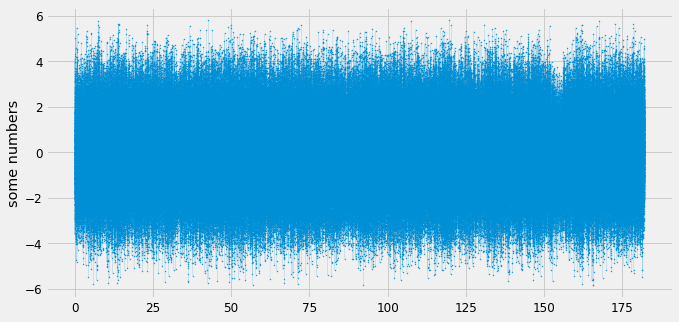

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
tips = sns.load_dataset('tips')

#183 days
plt_x = np.linspace(0, 182, 790560)
print(plt_x)
print(len(plt_x))

"""c = np.full(len(plt_x), 1)
print(c)"""


with plt.style.context('fivethirtyeight'):
    #plt.scatter(plt_x, data[0], linewidth=1,cmap = 'Blues', alpha=0.4,s=5,c=plt_x)
    plt.rcParams.update({'font.size': 12})    
    plt.rcParams["figure.figsize"] = (10,5)
    plt.scatter(plt_x, data[0], cmap = 'Blues', alpha=0.8,s=1)
    plt.plot(plt_x, data[0], linewidth=0.1, alpha=0.8)

plt.ylabel('some numbers')
plt.show()


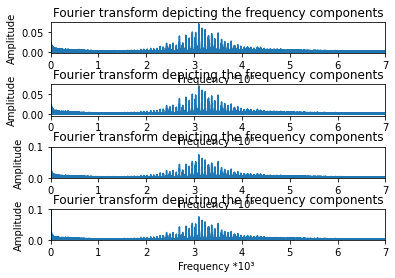

In [7]:
# From Pythonic: Applying Fourier Transform In Python Using Numpy.fft 

# How many time points are needed i,e., Sampling Frequency
samplingFrequency   = 1/20;

# At what intervals time points are sampled
samplingInterval       = 1 / samplingFrequency;

# Begin time period of the signals
beginTime           = 0; 

# End time period of the signals
endTime             = 182; 
 
# Time points
time        = np.arange(beginTime, endTime, samplingInterval);


# Perform FFT of the 4 given files
fig, ax = plt.subplots(4, 1)
plt.subplots_adjust(hspace=1)

tpCount     = len(data[0])
values      = np.arange(int(tpCount/2))
timePeriod  = tpCount/samplingFrequency
frequencies = values/timePeriod*1000
    
    
for i in range(len(data)):
    
    # Frequency domain representation
    fourierTransform = np.fft.fft(data[i])/len(data[i])           # Normalize amplitude
    fourierTransform = fourierTransform[range(int(len(data[i])/2))] # Exclude sampling frequency



    if (i == 0 or i == 1):
        ax[i].set_xlim([0,7])
    else:
        ax[i].set_ylim([0,0.1])
        ax[i].set_xlim([0,7])
        
    ax[i].set_title('Fourier transform depicting the frequency components')

    ax[i].plot(frequencies, abs(fourierTransform))

    ax[i].set_xlabel('Frequency *10³ ')

    ax[i].set_ylabel('Amplitude')

plt.show()

Analysis of data[0] (this is the zone analysed in the paper)

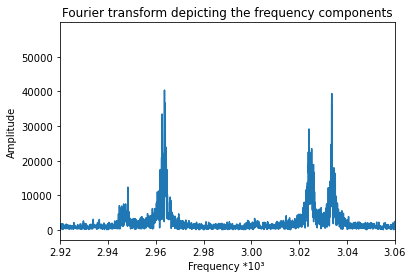

In [29]:
fourierTransform = np.fft.fft(data[0])#/len(data[0])           # Normalize amplitude
fourierTransform = fourierTransform[range(int(len(data[0])/2))] # Exclude sampling frequency

fig, ax = plt.subplots()

ax.set_xlim([2.920, 3.0600])
        
ax.set_title('Fourier transform depicting the frequency components')

ax.plot(frequencies, abs(fourierTransform))

ax.set_xlabel('Frequency *10³ ')

ax.set_ylabel('Amplitude')

plt.show()

Defining fit function

In [37]:
import math
from scipy.optimize import curve_fit

def lorentz(x, A, sigma, x0):
    cst = 0.00001
    y = A/math.pi*(sigma)/((x-x0)**2+(sigma)**2)
    return y

def gauss(x, A, B):
    y = A*np.exp(-1*B*x**2)
    return y

[8.97709545e+01 1.44039105e-03 2.96358585e+00]


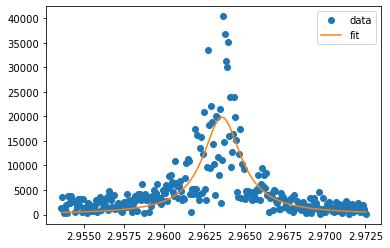

In [38]:
xdata = frequencies[46700:47000]
ydata  = abs(fourierTransform)[46700:47000]

# removing every 2 elements from array to fit
"""print(len(xdata))
xdata = np.delete(xdata, np.arange(0, xdata.size, 2))
ydata = np.delete(ydata, np.arange(0, ydata.size, 2))
print(len(xdata))"""

# fit
guess = [200, 0.0002, 2.96358]

pars, cov = curve_fit(lorentz, xdata, ydata, p0=guess, maxfev=5000)
fit_A = pars[0]
fit_sigma = pars[1]
fit_x0 = pars[2]

fit_y = lorentz(xdata, fit_A, fit_sigma, fit_x0)
plt.plot(xdata, ydata, 'o', label='data')
plt.plot(xdata, fit_y, '-', label='fit')
plt.legend()

print(pars)

# Fit to more peaks

Fitting peaks with frequencies between 2.6563448694596232 and 3.668285772110909

In [39]:
plt.rcParams.update({'font.size': 12})    
plt.rcParams["figure.figsize"] = (10,5)

2.6563448694596232
3.668285772110909


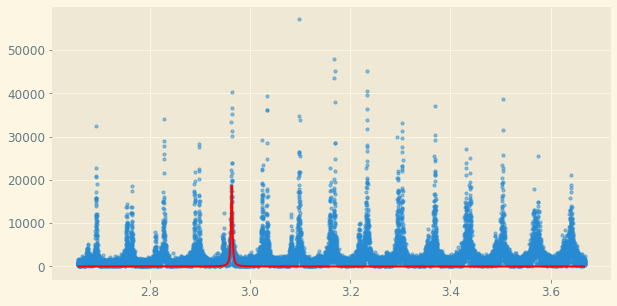

In [40]:
print(frequencies[42000])
print(frequencies[58000])

xdata = frequencies[42000:58000]
ydata  = abs(fourierTransform)[42000:58000]
with plt.style.context('Solarize_Light2'):
    plt.scatter(xdata, ydata, label='data', s=10, alpha=0.5)
    
#fit 1
guess1 = [200, 0.0002, 2.96358]

pars1, cov1 = curve_fit(lorentz, xdata, ydata, p0=guess1, maxfev=5000)
fit_y = lorentz(xdata, pars1[0],pars1[1], pars1[2])

with plt.style.context('Solarize_Light2'):
    plt.plot(xdata, fit_y, '-', label='fit',color='red')
    

plt.show()

2.846083788706739
3.1306921675774135


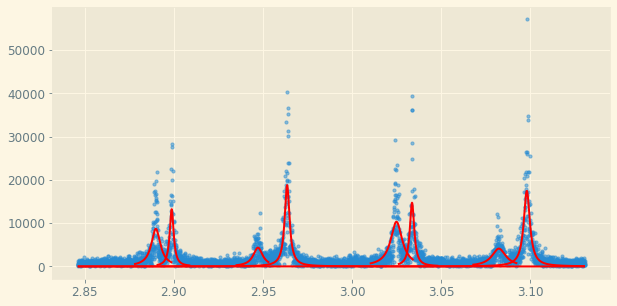

[2.963549284669984, 3.098011794075005, 2.8899132234187204, 2.898807808841091, 2.9471973605024804, 3.0248880532340405, 3.0336297532822636, 3.082330334189819]


In [41]:
fitted_frequencies = []

print(frequencies[45000])
print(frequencies[49500])

xdata = frequencies[45000:49500]
ydata  = abs(fourierTransform)[45000:49500]
with plt.style.context('Solarize_Light2'):
    plt.scatter(xdata, ydata, label='data', s=10, alpha=0.5)
    

### fit 1 ###
guess = [200, 0.0002, 2.96358]

pars, cov = curve_fit(lorentz, xdata, ydata, p0=guess, maxfev=5000)
fit_y = lorentz(xdata, pars[0],pars[1], pars[2])

with plt.style.context('Solarize_Light2'):
    plt.plot(xdata, fit_y, '-', label='fit',color='red')

fitted_frequencies.append(pars[2])

### fit 2 ###
guess = [100, 0.002, 3.099]

pars, cov = curve_fit(lorentz, xdata, ydata, p0=guess, maxfev=5000)
fit_y = lorentz(xdata, pars[0],pars[1], pars[2])

with plt.style.context('Solarize_Light2'):
    plt.plot(xdata, fit_y, '-', label='fit',color='red')
    
fitted_frequencies.append(pars[2])

### fit 3 ###
xdata = frequencies[45500:45840]
ydata  = abs(fourierTransform)[45500:45840]
guess = [300, 0.00002, 2.889]

pars, cov = curve_fit(lorentz, xdata, ydata, p0=guess, maxfev=5000)
fit_y = lorentz(xdata, pars[0],pars[1], pars[2])

with plt.style.context('Solarize_Light2'):
    plt.plot(xdata, fit_y, '-', label='fit',color='red')

fitted_frequencies.append(pars[2])

### fit 4 ###

xdata = frequencies[45700:46000]
ydata  = abs(fourierTransform)[45700:46000]
guess = [300, 0.00002, 2.90]

pars, cov = curve_fit(lorentz, xdata, ydata, p0=guess, maxfev=5000)
fit_y = lorentz(xdata, pars[0],pars[1], pars[2])

with plt.style.context('Solarize_Light2'):
    plt.plot(xdata, fit_y, '-', label='fit',color='red')
    
fitted_frequencies.append(pars[2])

### fit 5 ###

xdata = frequencies[46400:46700]
ydata  = abs(fourierTransform)[46400:46700]
guess = [50, 0.00002, 2.9472]

pars, cov = curve_fit(lorentz, xdata, ydata, p0=guess, maxfev=5000)
fit_y = lorentz(xdata, pars[0],pars[1], pars[2])

with plt.style.context('Solarize_Light2'):
    plt.plot(xdata, fit_y, '-', label='fit',color='red')

fitted_frequencies.append(pars[2])

### fit 6 ###

xdata = frequencies[47590:47980]
ydata  = abs(fourierTransform)[47590:47980]
guess = [399, 0.00002, 3.024]

pars, cov = curve_fit(lorentz, xdata, ydata, p0=guess, maxfev=5000)
fit_y = lorentz(xdata, pars[0],pars[1], pars[2])

with plt.style.context('Solarize_Light2'):
    plt.plot(xdata, fit_y, '-', label='fit',color='red')

fitted_frequencies.append(pars[2])

### fit 7 ###

xdata = frequencies[47840:48200]
ydata  = abs(fourierTransform)[47840:48200]
guess = [300, 0.00002, 3.026]

pars, cov = curve_fit(lorentz, xdata, ydata, p0=guess, maxfev=5000)
fit_y = lorentz(xdata, pars[0],pars[1], pars[2])

with plt.style.context('Solarize_Light2'):
    plt.plot(xdata, fit_y, '-', label='fit',color='red')

fitted_frequencies.append(pars[2])

### fit 8 ###

xdata = frequencies[48500:48900]
ydata  = abs(fourierTransform)[48500:48900]
guess = [30, 0.00002, 3.082]

pars, cov = curve_fit(lorentz, xdata, ydata, p0=guess, maxfev=5000)
fit_y = lorentz(xdata, pars[0],pars[1], pars[2])

with plt.style.context('Solarize_Light2'):
    plt.plot(xdata, fit_y, '-', label='fit',color='red')

fitted_frequencies.append(pars[2])

plt.show()
print(fitted_frequencies)

# Computing small and large separations obtained in part I

In [9]:
frequencies_theory_n_l0 = [[3,0.535308], [4,0.679501], [6,0.970528], [7,1.115391], [8,1.260426], [9,1.403781], [10,1.543825], [11,1.681478], [12,1.817298], [13,1.953574], [14,2.090097], [15,2.225231], [16,2.359319], [17,2.492708], [18,2.626554], [19,2.761449], [20,2.896414], [21,3.031626], [22,3.16692], [23,3.302485], [24,3.438826], [25,3.575348], [26,3.712182], [27,3.849159], [28,3.986249], [29,4.123775], [30,4.261271], [31,4.398846], [32,4.536387], [33,4.673751], [35,4.946911], [36,5.095484], [37,5.234301], [38,5.373123], [39,5.512118], [40,5.65101], [41,5.78991], [42,5.928871], [43,6.067785], [44,6.206761], [45,6.345584], [46,6.48434], [47,6.62311], [48,6.761761], [50,7.038738], [51,7.176977], [52,7.315157], [53,7.453125], [54,7.590913]]

n is ordem radial; l is graus
1 coluna      = grau, 
2 coluna      = ordem radial,
ultima coluna = frequencia propria (mHz)

# Computing small separation for the fitted frequencies

just plotting to look at theoretical frequencies and the fitted ones

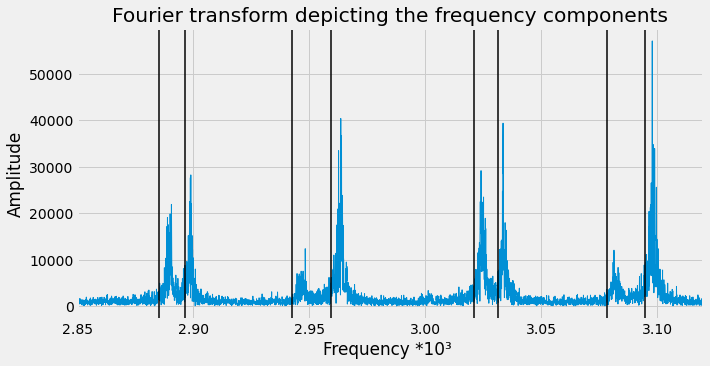

In [65]:
xdata = frequencies
ydata  = abs(fourierTransform)



with plt.style.context('fivethirtyeight'):
    plt.xlim([2.85, 3.12])
    plt.title('Fourier transform depicting the frequency components')
    plt.xlabel('Frequency *10³ ')
    plt.ylabel('Amplitude')
    plt.plot(xdata, ydata, label='data', linewidth=1, alpha=1)
    


for i in frequencies_theory_l0:
    plt.axvline(x = i, color = 'black', label = 'axvline - full height')

for i in frequencies_theory_l1:
    plt.axvline(x = i, color = 'black', label = 'axvline - full height')

for i in frequencies_theory_l2:
    plt.axvline(x = i, color = 'black', label = 'axvline - full height')

for i in frequencies_theory_l3:
    plt.axvline(x = i, color = 'black', label = 'axvline - full height')




plt.show()

l=0

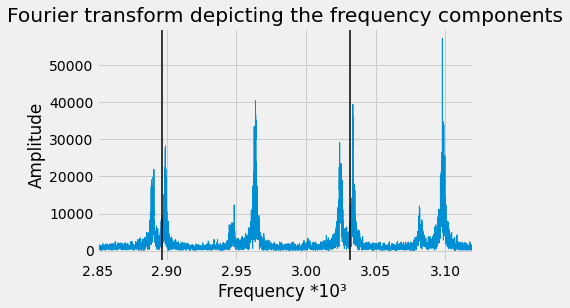

In [35]:
xdata = frequencies[45000:49500]
ydata  = abs(fourierTransform)[45000:49500]



with plt.style.context('fivethirtyeight'):
    plt.xlim([2.85, 3.12])
    plt.title('Fourier transform depicting the frequency components')
    plt.xlabel('Frequency *10³ ')
    plt.ylabel('Amplitude')
    plt.plot(xdata, ydata, label='data', linewidth=1, alpha=1)
    


for i in frequencies_theory_l0:
    plt.axvline(x = i, color = 'black', label = 'axvline - full height')




plt.show()

(l=0) for the two plotted peaks above:

->theoretic (n, frequency): [20,2.896414], [21,3.031626]

->fitted frequencies: 2.898807808841091, 3.024888053234040

==> theoretical SS = 3.031626-2.896414 = 0.135212

==> exp SS = 0.12608024439294896

l=1

In [53]:
frequencies_theory_l1 = [0.891473, 1.036782, 1.182289, 1.325785, 1.468123, 1.606647, 1.743139, 1.879592, 2.015963, 2.152349, 2.28712, 2.42074, 2.554625, 2.689054, 2.824228, 2.959557, 3.094791, 3.23037, 3.366419, 3.502967, 3.639851, 3.776819, 3.913997, 4.051451, 4.189064, 4.326765, 4.464404, 4.601967, 4.739407, 4.876241, 5.023275, 5.162115, 5.301017, 5.44002, 5.579044, 5.718011, 5.857005, 5.996009, 6.135015, 6.273986]
frequencies_theory_n_l1 = [[5,0.891473],[6,1.036782],[7,1.182289],[8,1.325785],[9,1.468123],[10,1.606647],[11,1.743139],[12,1.879592],[13,2.015963],[14,2.152349],[15,2.28712],[16,2.42074],[17,2.554625],[18,2.689054],[19,2.824228],[20,2.959557],[21,3.094791],[22,3.23037],[23,3.366419],[24,3.502967],[25,3.639851],[26,3.776819],[27,3.913997],[28,4.051451],[29,4.189064],[30,4.326765],[31,4.464404],[32,4.601967],[33,4.739407],[34,4.876241],[35,5.023275],[36,5.162115],[37,5.301017],[38,5.44002],[39,5.579044],[40,5.718011],[41,5.857005],[42,5.996009],[43,6.135015],[44,6.273986]]

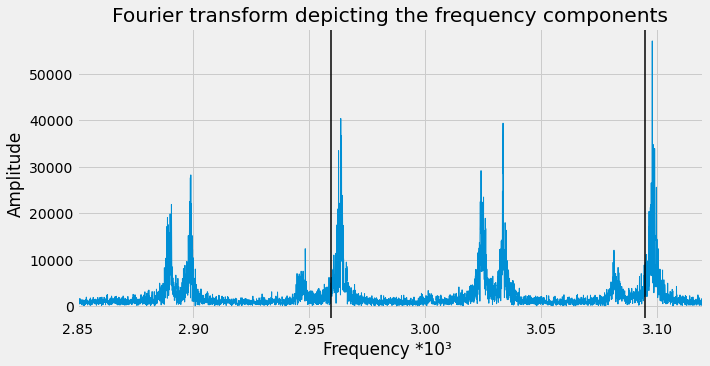

In [54]:
xdata = frequencies
ydata  = abs(fourierTransform)



with plt.style.context('fivethirtyeight'):
    plt.xlim([2.85, 3.12])
    plt.title('Fourier transform depicting the frequency components')
    plt.xlabel('Frequency *10³ ')
    plt.ylabel('Amplitude')
    plt.plot(xdata, ydata, label='data', linewidth=1, alpha=1)
    


for i in frequencies_theory_l1:
    plt.axvline(x = i, color = 'black', label = 'axvline - full height')




plt.show()

(l=1) for the two plotted peaks above:

->theoretic (n, frequency): [20,2.959557],[21,3.094791]

->fitted frequencies: 2.963549284669984, 3.098011794075005

==> theoretical SS = 3.094791-2.959557 = 0.13523399999999963

==> exp SS = 0.1344625094050209

l=2

In [58]:
frequencies_theory_l2 = [0.957193, 1.101802, 1.246902, 1.390052, 1.530353, 1.668165, 1.804061, 1.940584, 2.077293, 2.212784, 2.34722, 2.480858, 2.615009, 2.750181, 2.885445, 3.02098, 3.156551, 3.292407, 3.42903, 3.565824, 3.702942, 3.840181, 3.977531, 4.115312, 4.253053, 4.390873, 4.528647, 4.66624, 4.803671, 4.939921, 5.088536, 5.227532, 5.366524, 5.505683, 5.644735, 5.783787, 5.922895, 6.06195, 6.201058]

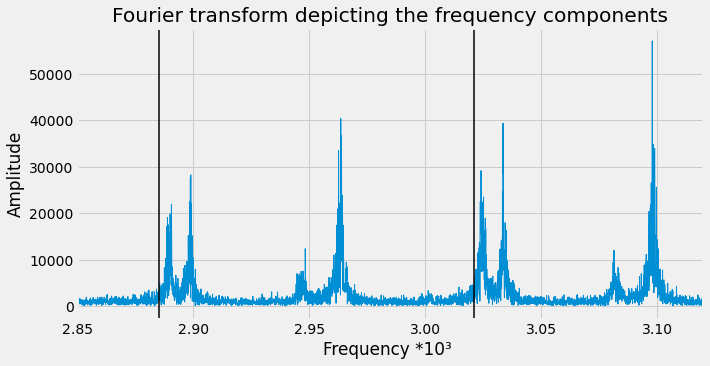

In [60]:
xdata = frequencies
ydata  = abs(fourierTransform)



with plt.style.context('fivethirtyeight'):
    plt.xlim([2.85, 3.12])
    plt.title('Fourier transform depicting the frequency components')
    plt.xlabel('Frequency *10³ ')
    plt.ylabel('Amplitude')
    plt.plot(xdata, ydata, label='data', linewidth=1, alpha=1)
    


for i in frequencies_theory_l2:
    plt.axvline(x = i, color = 'black', label = 'axvline - full height')




plt.show()

(l=2) for the two plotted peaks above:

->theoretic (n, frequency): [19 2.885445] [20 3.02098]

->fitted frequencies: 2.8899132234187204 3.024888053234040

==> theoretical SS = 0.135535

==> exp SS = 0.13497482981531972

l=3

In [68]:
frequencies_theory_l3 = [0.864609, 1.012056, 1.158037, 1.302591, 1.445901, 1.585199, 1.722534, 1.859199, 1.995954, 2.132971, 2.268246, 2.402443, 2.536677, 2.671394, 2.807062, 2.942791, 3.078497, 3.214521, 3.350926, 3.487938, 3.625222, 3.762608, 3.900194, 4.037984, 4.175992, 4.314043, 4.452032, 4.589953, 4.727719, 4.864958, 4.999742, 5.151218, 5.290399, 5.429645, 5.56893, 5.708133, 5.847348, 5.986578, 6.125788, 6.264974]

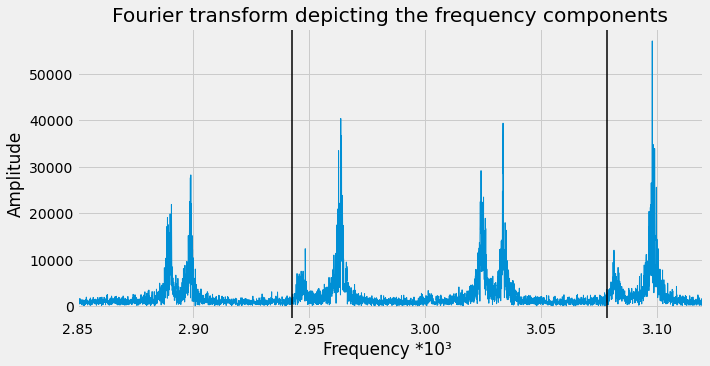

In [69]:
xdata = frequencies
ydata  = abs(fourierTransform)



with plt.style.context('fivethirtyeight'):
    plt.xlim([2.85, 3.12])
    plt.title('Fourier transform depicting the frequency components')
    plt.xlabel('Frequency *10³ ')
    plt.ylabel('Amplitude')
    plt.plot(xdata, ydata, label='data', linewidth=1, alpha=1)
    


for i in frequencies_theory_l3:
    plt.axvline(x = i, color = 'black', label = 'axvline - full height')




plt.show()

(l=3) for the two plotted peaks above:

->theoretic (n, frequency): [19 2.942791], [20 3.078497]

->fitted frequencies: 2.9471973605024804 3.082330334189819

==> theoretical SS = 0.135706

==> exp SS = 0.1351329736873388

plot for l = 0 the theoretical small separation as a function of the frequencies